# t-SNE projections for different data sources

#### Load dependencies and libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

#### Load datasets

In [14]:
na_values = ['NaN', 'NA', 'na', 'nan']

fp = pd.read_csv('CYP2C9_fingerprints.csv', header=None, na_values=na_values)
desc = pd.read_csv('CYP2C9_descriptors.csv', sep='\t', na_values=na_values)
emb = pd.read_csv('CYP2C9_embeddings.csv', na_values=na_values)

target = pd.read_csv('CYP2C9_class.csv', na_values=na_values)

#### Find any NA values and drop such rows

In [15]:
index_null_data = fp[fp.isnull().any(axis=1)].index
desc.drop(desc.columns[desc.isna().mean() > 0.05], inplace=True, axis=1)

In [3]:
emb

,Unnamed: 0,Smiles,mol2vec-000,mol2vec-001,mol2vec-002,mol2vec-003,mol2vec-004,mol2vec-005,mol2vec-006,mol2vec-007,...,mol2vec-090,mol2vec-091,mol2vec-092,mol2vec-093,mol2vec-094,mol2vec-095,mol2vec-096,mol2vec-097,mol2vec-098,mol2vec-099
0,0,BrC(c1cccc2ccccc12)c1cccc2ccccc12,-19.804852,-0.559720,-0.765929,12.864660,-24.090914,-2.811734,-5.304622,-6.846907,...,-3.115001,1.669081,-9.746439,-10.126205,-4.691540,-14.811422,-7.606926,-3.296021,-11.325224,2.310728
1,1,O=C(CNc1cccc2ccccc12)N/N=C/C(Br)=C/c1ccccc1,-4.670510,-0.251325,16.880894,11.641191,-26.295960,8.407849,-6.338064,-18.806880,...,-8.815414,10.886111,-13.786540,-4.496993,-8.339731,-8.072093,-13.885213,-13.595044,-22.924660,3.819838
2,2,O=C(Cc1cccs1)N/N=C/C(Br)=C/c1ccccc1,3.371361,3.931090,19.555132,11.229526,-13.634205,10.798942,0.303590,-12.345820,...,-7.664638,8.819976,-5.756341,-6.726579,-2.970418,-3.550949,-8.129580,-14.310749,-19.041126,4.268033
3,3,O=C1O/C(=C\Br)CC[C@@H]1c1cccc2ccccc12,-17.890648,-1.302134,2.977623,1.309162,-17.744938,3.530558,-3.720360,-9.445618,...,0.372024,9.423272,-9.625802,-16.666750,0.761991,-12.066940,-8.192518,-6.253363,-9.432507,-1.653818
4,4,Brc1cc2c(cc1/C=N/Nc1nc(N3CCCC3)nc(N3CCOCC3)n1)...,-10.269396,-11.555328,13.389703,-16.996960,-12.354313,22.193783,-2.502014,-19.837164,...,14.115686,20.796343,2.105849,-3.046359,11.007848,-1.847686,-18.636772,-38.817350,-31.749668,6.031893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,11928,O=C(Nc1ccccc1[N+](=O)[O-])C1C(c2ccccc2)=C1c1cc...,-22.476173,-3.649607,7.069636,17.470041,-28.831300,-3.764248,-8.223659,-14.299685,...,-2.364965,16.117613,-18.131920,-16.368525,-5.179848,-12.310451,-13.796478,-2.773045,-17.766964,-10.555487
11929,11929,O=c1c2ccccc2nc2n1CC/C2=C\c1ccccc1[N+](=O)[O-],-19.255010,-4.904727,2.614642,10.526570,-29.902588,-2.066730,-5.297285,-14.943941,...,5.381092,20.315544,-17.761919,-18.916677,9.687876,-9.145055,-5.640758,-7.306581,-28.544240,8.884321
11930,11930,O=C(N/N=C/c1ccc([N+](=O)[O-])o1)c1cc(-c2ccncc2...,-19.345010,2.669637,21.328644,14.002327,-24.622717,-6.544120,4.682155,-13.321634,...,1.482594,13.489780,-9.499893,-12.123225,-4.079001,-10.123239,-12.196126,-17.816816,-33.799236,10.039253
11931,11931,c1ccc(-c2c3c4ccccc4nc-3[nH]c3ccccc23)cc1,-21.016930,0.124581,8.117022,18.053001,-24.458970,-2.956478,-3.628755,-6.697377,...,7.274594,15.313823,-9.403180,-16.335495,8.034044,-4.076332,-4.967917,1.370810,-6.653099,2.259097


In [16]:
fp.drop(index_null_data, inplace=True)
desc.drop(index_null_data, inplace=True)
target.drop(index_null_data, inplace=True)

mapping = {'Active': 1, 'Inactive': 0}
target.replace({'Class': mapping}, inplace=True)

desc.fillna(value=-9999, inplace = True)


fp_ss= fp.iloc[:,1:]
desc_ss = desc.iloc[:,2:]
emb_ss = emb.iloc[:,2:]

#### Build t-SNE

In [17]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=10000, metric="euclidean", n_jobs=4, n_iter_without_progress=500, random_state=42)

#### Run for Fingeprints

In [15]:
tsne_results = tsne.fit_transform(fp_ss)
output_file_name = 'tsne_CYP2C9_fingerprints.csv'

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 11933 samples in 1.821s...
[t-SNE] Computed neighbors for 11933 samples in 9.202s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11933
[t-SNE] Computed conditional probabilities for sample 2000 / 11933
[t-SNE] Computed conditional probabilities for sample 3000 / 11933
[t-SNE] Computed conditional probabilities for sample 4000 / 11933
[t-SNE] Computed conditional probabilities for sample 5000 / 11933
[t-SNE] Computed conditional probabilities for sample 6000 / 11933
[t-SNE] Computed conditional probabilities for sample 7000 / 11933
[t-SNE] Computed conditional probabilities for sample 8000 / 11933
[t-SNE] Computed conditional probabilities for sample 9000 / 11933
[t-SNE] Computed conditional probabilities for sample 10000 / 11933
[t-SNE] Computed conditional probabilities for sample 11000 / 11933
[t-SNE] Computed conditional probabilities for sample 11933 / 11933
[t-SNE] Mean sigma: 4.973309
[t-SNE] KL divergenc

In [16]:
fp_ss['tsne-2d-one'] = tsne_results[:,0]
fp_ss['tsne-2d-two'] = tsne_results[:,1]

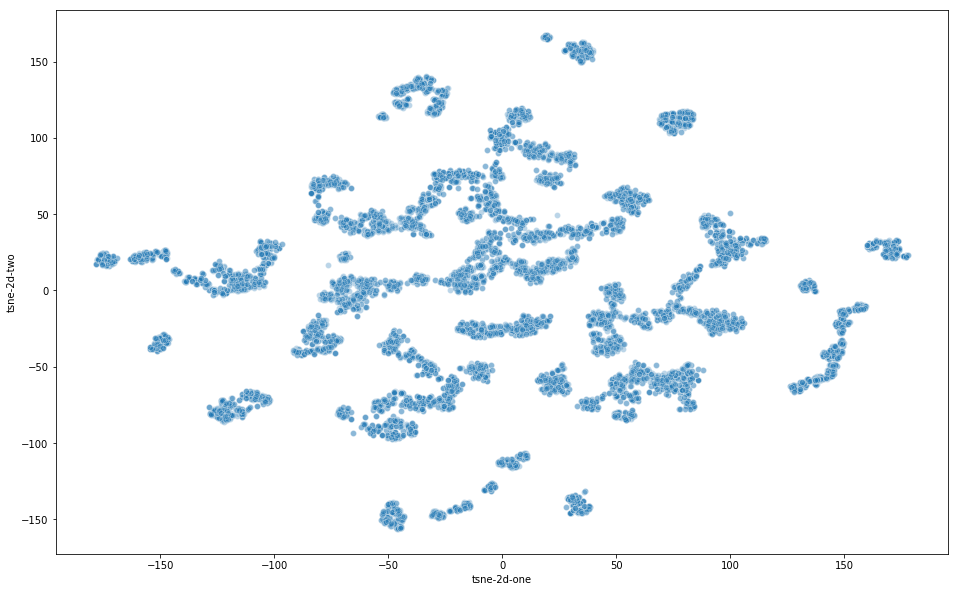

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=fp_ss,
    legend="full",
    alpha=0.3
)

In [51]:
data ={'SMILES':fp.iloc[:,0], 'tsne_0':tsne_results[:,0], 'tsne_1':tsne_results[:,1], 'class':target.iloc[:,0]}

,Class
0,1
1,1
2,1
3,0
4,1
...,...
11935,1
11936,1
11937,1
11938,1


#### Run for descriptors

In [128]:
tsne_results = tsne.fit_transform(desc_ss)
output_file_name = 'tsne_CYP2C9_descriptors.csv'

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 11933 samples in 6.202s...
[t-SNE] Computed neighbors for 11933 samples in 47.412s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11933
[t-SNE] Computed conditional probabilities for sample 2000 / 11933
[t-SNE] Computed conditional probabilities for sample 3000 / 11933
[t-SNE] Computed conditional probabilities for sample 4000 / 11933
[t-SNE] Computed conditional probabilities for sample 5000 / 11933
[t-SNE] Computed conditional probabilities for sample 6000 / 11933
[t-SNE] Computed conditional probabilities for sample 7000 / 11933
[t-SNE] Computed conditional probabilities for sample 8000 / 11933
[t-SNE] Computed conditional probabilities for sample 9000 / 11933
[t-SNE] Computed conditional probabilities for sample 10000 / 11933
[t-SNE] Computed conditional probabilities for sample 11000 / 11933
[t-SNE] Computed conditional probabilities for sample 11933 / 11933
[t-SNE] Mean sigma: 177.243284
[t-SNE] KL diverg

In [132]:
desc_ss['tsne-2d-one'] = tsne_results[:,0]
desc_ss['tsne-2d-two'] = tsne_results[:,1]

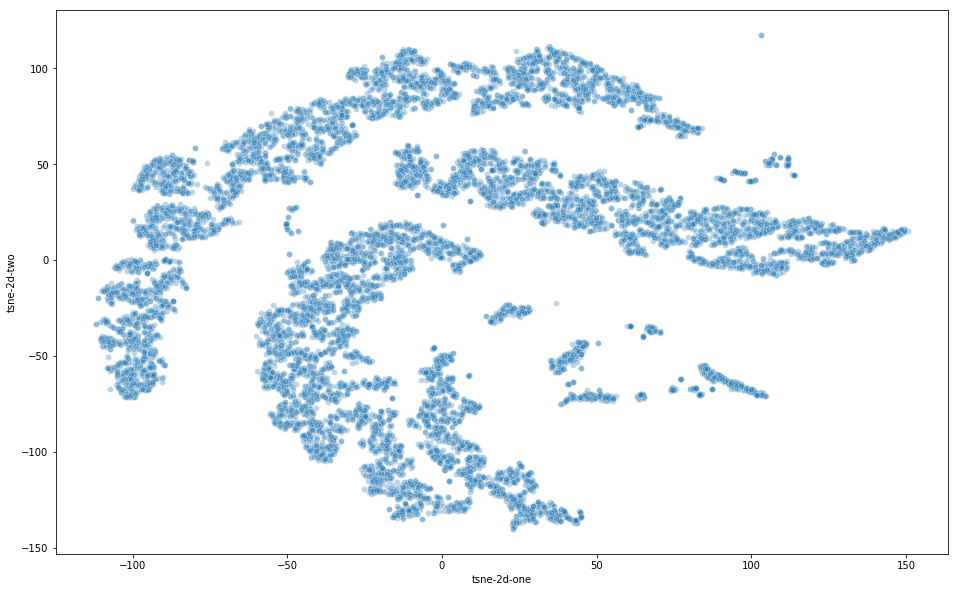

In [133]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=desc_ss,
    legend="full",
    alpha=0.3
)

In [134]:
data ={'SMILES':desc.iloc[:,1], 'tsne_0':tsne_results[:,0], 'tsne_1':tsne_results[:,1], 'class':target.iloc[:,0]}

#### Run for Embeddings

In [18]:
tsne_results = tsne.fit_transform(emb_ss)
output_file_name = 'tsne_CYP2C9_embeddings.csv'

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 11933 samples in 0.217s...
[t-SNE] Computed neighbors for 11933 samples in 15.880s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11933
[t-SNE] Computed conditional probabilities for sample 2000 / 11933
[t-SNE] Computed conditional probabilities for sample 3000 / 11933
[t-SNE] Computed conditional probabilities for sample 4000 / 11933
[t-SNE] Computed conditional probabilities for sample 5000 / 11933
[t-SNE] Computed conditional probabilities for sample 6000 / 11933
[t-SNE] Computed conditional probabilities for sample 7000 / 11933
[t-SNE] Computed conditional probabilities for sample 8000 / 11933
[t-SNE] Computed conditional probabilities for sample 9000 / 11933
[t-SNE] Computed conditional probabilities for sample 10000 / 11933
[t-SNE] Computed conditional probabilities for sample 11000 / 11933
[t-SNE] Computed conditional probabilities for sample 11933 / 11933
[t-SNE] Mean sigma: 14.396416
[t-SNE] KL diverge

In [19]:
emb_ss['tsne-2d-one'] = tsne_results[:,0]
emb_ss['tsne-2d-two'] = tsne_results[:,1]

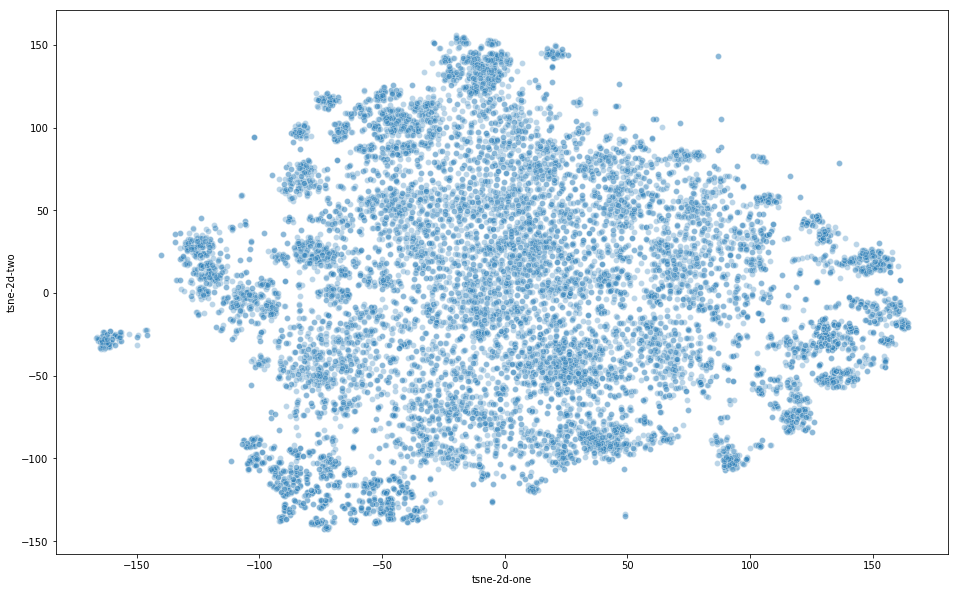

In [20]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=emb_ss,
    legend="full",
    alpha=0.3
)

In [37]:
data ={'SMILES':emb.iloc[:,1], 'tsne_0':tsne_results[:,0], 'tsne_1':tsne_results[:,1], 'class':target.iloc[:,0]}

#### Save t-SNE projection to csv file

In [38]:
df = pd.DataFrame(data, columns = ['SMILES', 'tsne_0', 'tsne_1', 'class'])
df.to_csv(output_file_name)